In [1]:
import numpy as np
from scipy.optimize import fsolve
import MalthusModel

model_cobb = MalthusModel.Malthus_cobbd()
print(model_cobb.Lt1(6,2))

11.399999999999999


Finder SS værdier:

In [9]:
eta = 1 #Definerer eta
L_guess = 10 #indstiller første gæt af L

initial_guess = [L_guess, model_cobb.Yt(L_guess)] #indstiller første gæt af L og Y

SS_values = fsolve(model_cobb.ss_conditions, initial_guess, args=(eta))

L_SS_value, Y_SS_value = SS_values

#print(SS_values)
print('The steady state value for the output Y is ', model_cobb.Yt(L_SS_value))
print('The steady state value for the labor force L is ', model_cobb.Lt1(L_SS_value, eta))

The steady state value for the output Y is  3.8729833462074166
The steady state value for the labor force L is  12.872983346207416


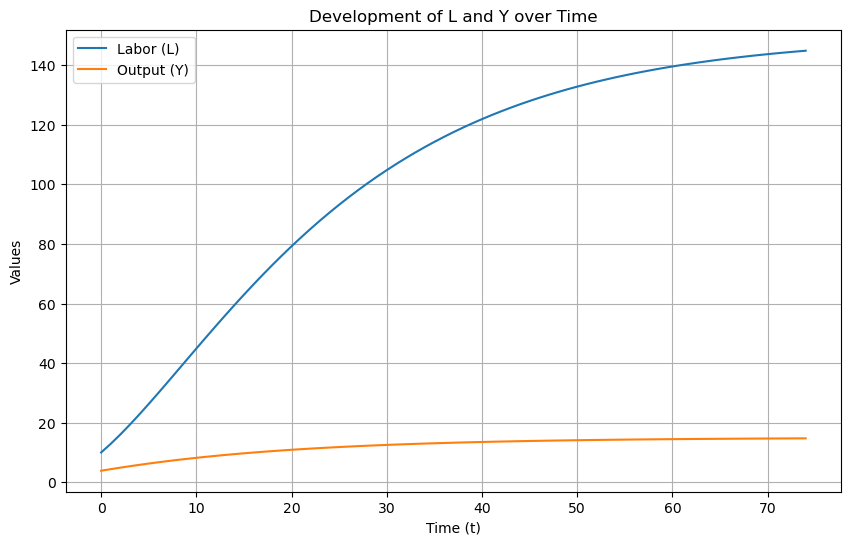

In [12]:
import matplotlib.pyplot as plt
initial_L = 10  # Initial value of L
num_periods = 75  # Number of time periods to simulate

# Arrays to store values over time
L_values = np.zeros(num_periods)
Y_values = np.zeros(num_periods)

# Initialize the first value
L_values[0] = initial_L
Y_values[0] = model_cobb.Yt(L_values[0])

# Simulate the system over time
for t in range(1, num_periods):
    Y_t = Y_values[t - 1]
    L_t = L_values[t - 1]
    
    # Calculate n_t
    n_t = model_cobb.nt(eta, L_t)
    
    # Calculate L_{t+1}
    L_next = model_cobb.Lt1(L_t, eta)
    
    # Update arrays
    L_values[t] = L_next
    Y_values[t] = model_cobb.Yt(L_next)

# Plotting the results
time_periods = np.arange(num_periods)

plt.figure(figsize=(10, 6))
plt.plot(time_periods, L_values, label='Labor (L)')
plt.plot(time_periods, Y_values, label='Output (Y)')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.title('Development of L and Y over Time')
plt.legend()
plt.grid(True)
plt.show()
